<a href="https://colab.research.google.com/github/FernandoIGD12/UTEC_programming101/blob/main/hackaton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import kagglehub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
path = kagglehub.dataset_download("blastchar/telco-customer-churn")
print("Path to dataset files:", path)
path = path + '/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(path)
df.head()

Path to dataset files: /kaggle/input/telco-customer-churn


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [15]:
churn_dummies = pd.get_dummies(df['Churn'], drop_first=True)
df = pd.concat([df, churn_dummies], axis=1)
df.drop('Churn', axis=1, inplace=True)
df.rename(columns={'Yes': 'Churn'}, inplace=True)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,False
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,False
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,True
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,False
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,True


In [24]:
gone = df[df['Churn'] == True]['Churn'].count()
total = df.shape[0]
#print(gone)
gone_ratio = gone/total
print(f'Porcentage of customers who left last month is: {gone_ratio*100: 0.2f}%')

1869
Porcentage of customers who left last month is:  26.54%


In [27]:
df['Contract'].value_counts()

,count
Contract,
Month-to-month,3875
Two year,1695
One year,1473


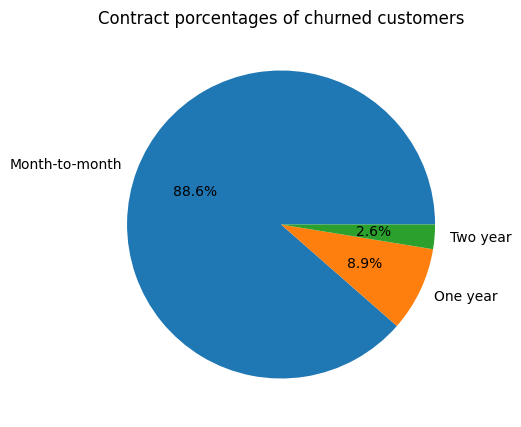

48


In [65]:
contract = df[df['Churn'] == True].groupby('Contract')['Churn'].count()
figure = plt.figure(figsize=(10, 5))
plt.pie(contract, labels=contract.index, autopct='%1.1f%%')
plt.title('Contract porcentages of churned customers')
plt.show()

print(df[(df['Churn'] == True) & (df['Contract'] == 'Two year')].shape[0])

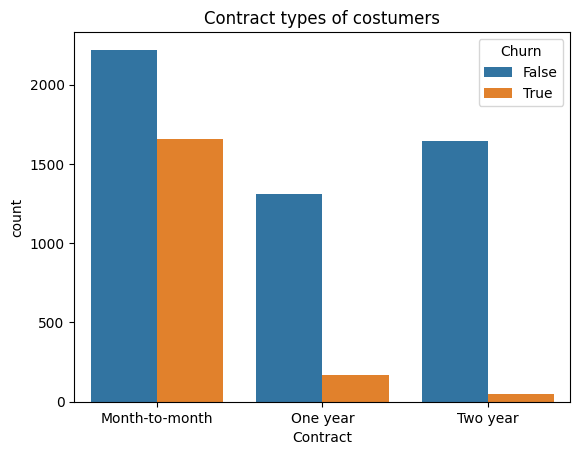

In [97]:
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Contract types of costumers')
plt.show()

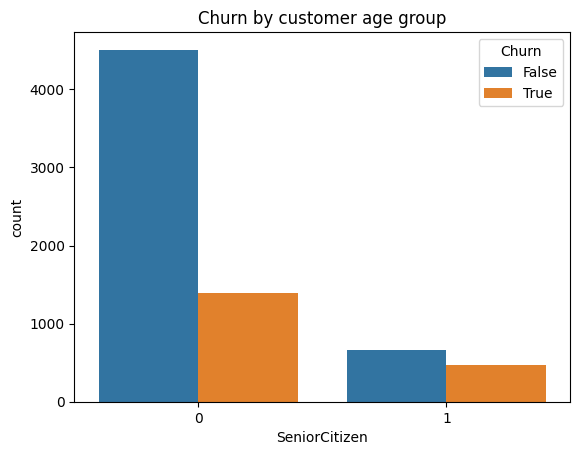

In [99]:
sns.countplot(data=df, x='SeniorCitizen', hue='Churn')
plt.title('Churn by customer age group')
plt.show()

/tmp/ipython-input-54-1482302601.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Churn', y='tenure', data=df, ci=None, color = 'lightblue')  # ci=None removes confidence intervals


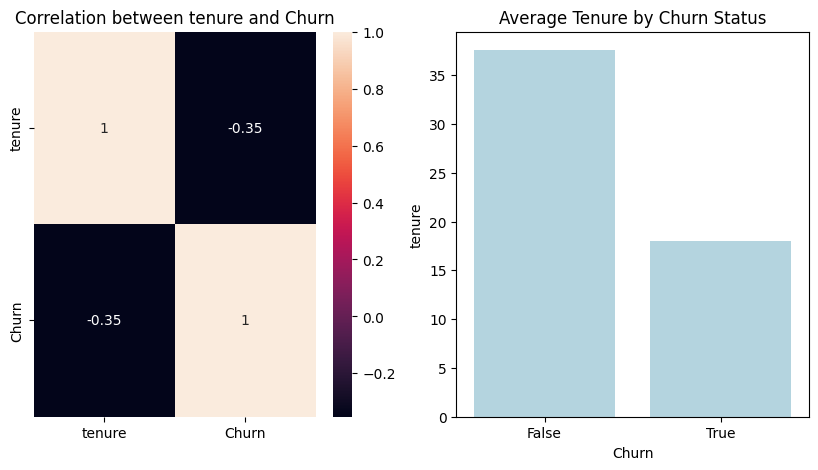

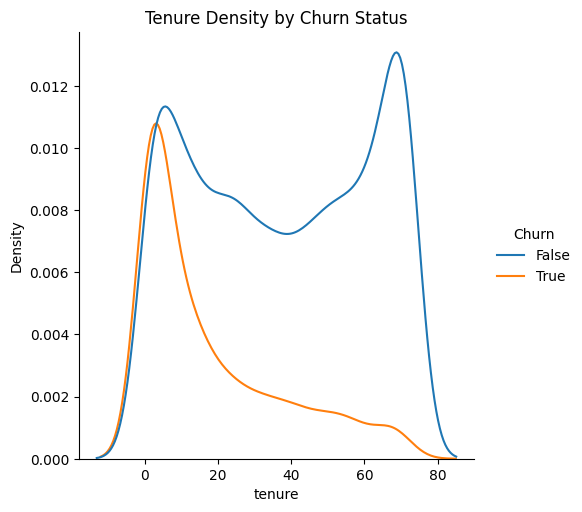

In [54]:
correlation = df[['tenure', 'Churn']].corr()

figure = plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
sns.heatmap(correlation, annot=True)
plt.title('Correlation between tenure and Churn')

plt.subplot(1,2,2)
sns.barplot(x='Churn', y='tenure', data=df, ci=None, color = 'lightblue')  # ci=None removes confidence intervals
plt.title("Average Tenure by Churn Status")
plt.show()

sns.displot(data=df, x='tenure', hue='Churn', kind = 'kde')
plt.title("Tenure Density by Churn Status")
plt.show()


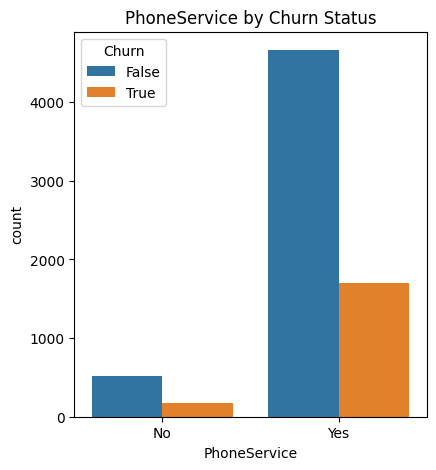

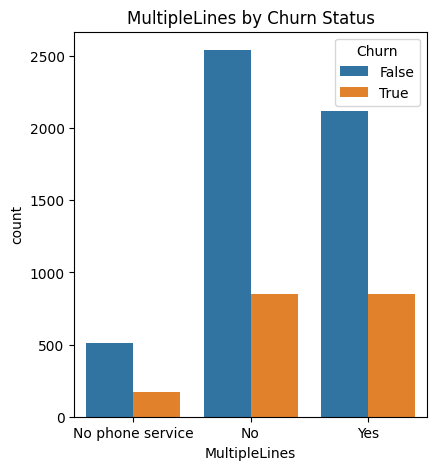

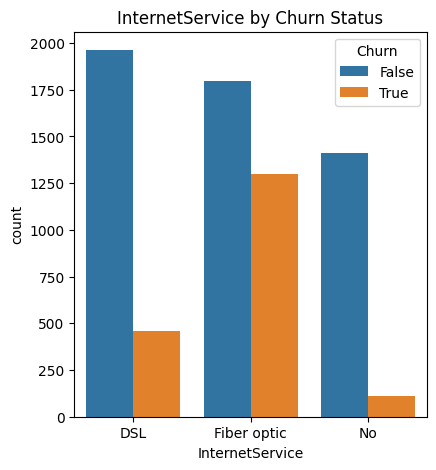

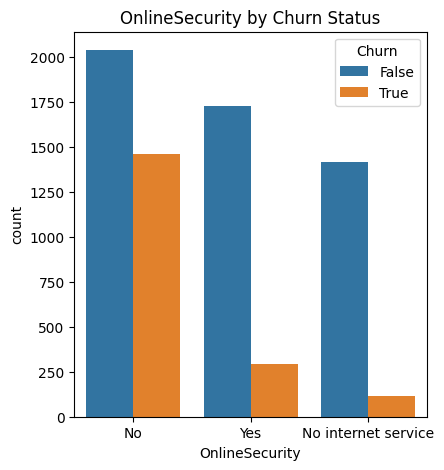

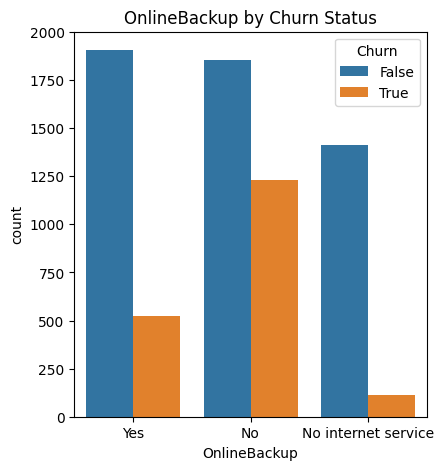

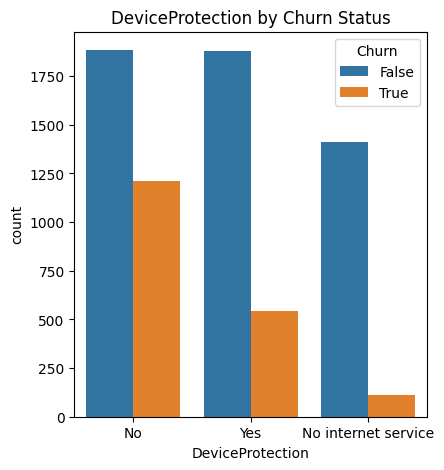

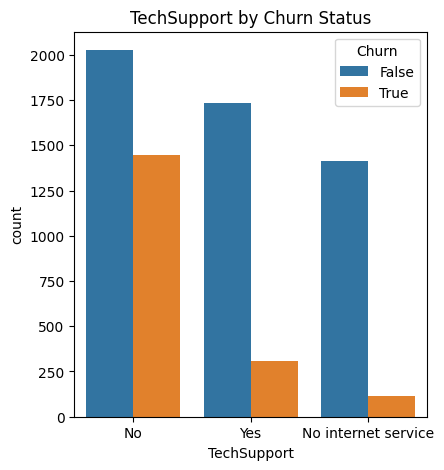

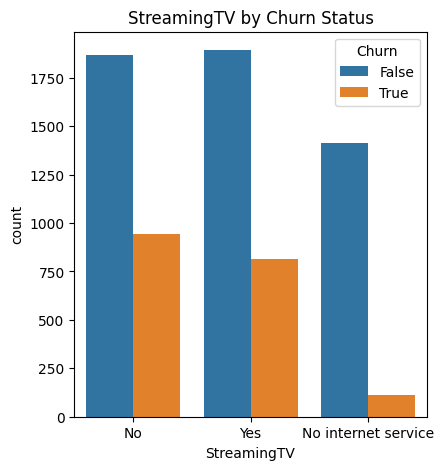

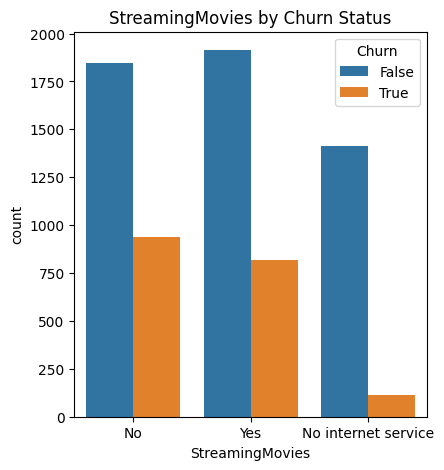

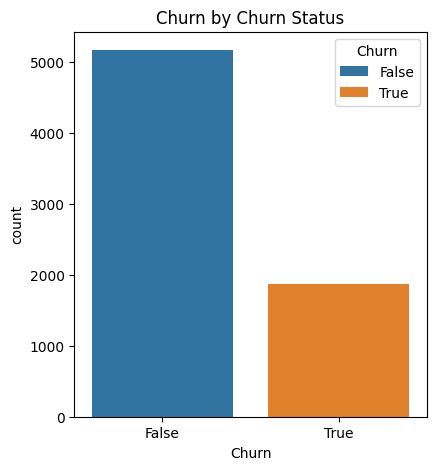

In [58]:
services = ['PhoneService', 'MultipleLines', 'InternetService',
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
           'StreamingTV', 'StreamingMovies', 'Churn']

df[services].head()

for service in services:
    figure = plt.figure(figsize=(10, 5))
    plt.subplot(1,2,1)
    sns.countplot(data=df, x=service, hue='Churn')
    plt.title(f'{service} by Churn Status')
    plt.show()

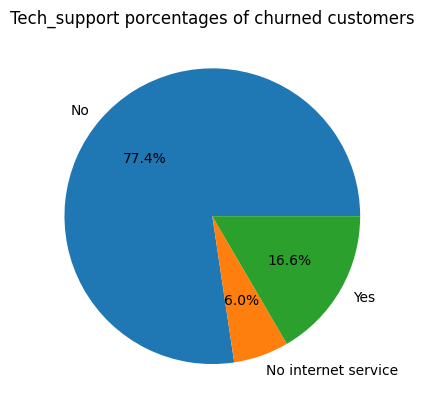

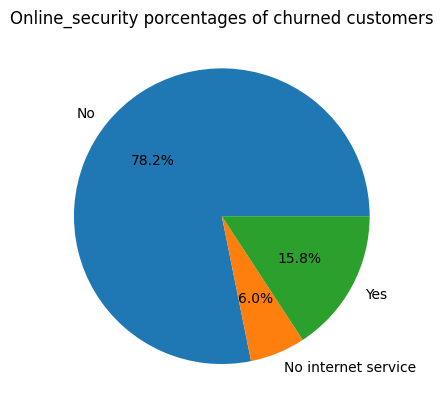

In [72]:

#plt.subplot(1,3,1)
#internet = df[df['Churn'] == True].groupby('InternetService')['Churn'].count()
#plt.pie(internet, labels=internet.index, autopct='%1.1f%%')

#plt.subplot(1,3,2)
support = df[df['Churn'] == True].groupby('TechSupport')['Churn'].count()
plt.pie(support, labels=support.index, autopct='%1.1f%%')
plt.title('Tech_support porcentages of churned customers')
plt.show()

#plt.subplot(1,3,3)
security = df[df['Churn'] == True].groupby('OnlineSecurity')['Churn'].count()
plt.pie(security, labels=security.index, autopct='%1.1f%%')
plt.title('Online_security porcentages of churned customers')
plt.show()

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

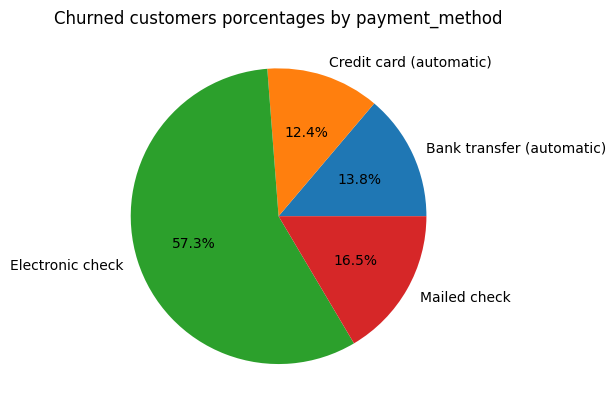

In [74]:
payment = df[df['Churn'] == True].groupby('PaymentMethod')['Churn'].count()
plt.pie(payment, labels=payment.index, autopct='%1.1f%%')
plt.title('Churned customers porcentages by payment_method')
plt

<Figure size 1000x400 with 0 Axes>

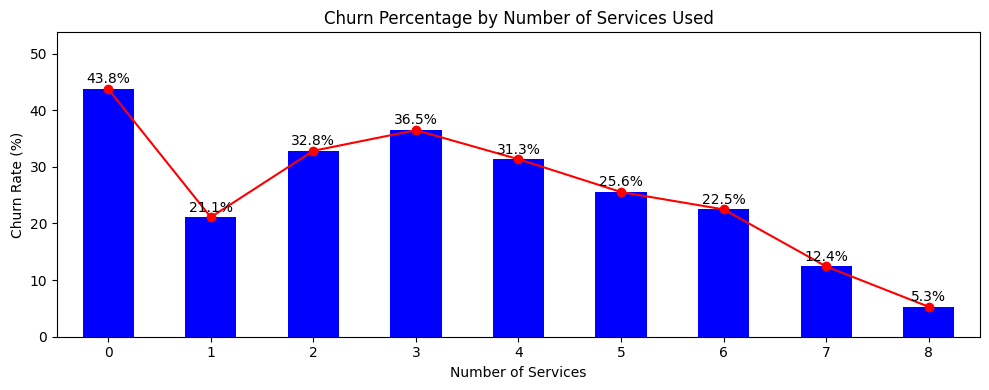

In [95]:
services = ['PhoneService', 'MultipleLines', 'InternetService',
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
            'StreamingTV', 'StreamingMovies']

df['TotalServices'] = 0
for service in services:
    df['TotalServices'] += (df[service] == 'Yes').astype(int)

churn_rate = df.groupby('TotalServices')['Churn'].value_counts(normalize=True).unstack() * 100
churn_rate.reset_index(inplace=True)
churn_rate.columns = ['TotalServices', 'No', 'Yes']

plt.figure(figsize=(10,4))

plt.figure(figsize=(10,4))
ax = churn_rate['Yes'].plot(kind='bar', color='blue', label='Churn Rate (%)')
churn_rate['Yes'].plot(kind='line', marker='o', color='red', label='Trend', ax=ax)


for i, v in enumerate(churn_rate['Yes']):
    ax.text(i, v + 1, f"{v:.1f}%", ha='center')

plt.title("Churn Percentage by Number of Services Used")
plt.xlabel("Number of Services")
plt.ylabel("Churn Rate (%)")
plt.xticks(rotation=0)
plt.ylim(0, churn_rate['Yes'].max() + 10)
plt.tight_layout()

plt.show()


In [102]:
churn_rate.head(10)

,TotalServices,No,Yes
0,0,56.250000,43.750000
1,1,78.894768,21.105232
2,2,67.171717,32.828283
3,3,63.523316,36.476684
4,4,68.655098,31.344902
5,5,74.449339,25.550661
6,6,77.514793,22.485207
7,7,87.594937,12.405063
8,8,94.711538,5.288462
